# Predictive Maintenance

## 1. Problem Statement

Our task is the development of a Web App for Predictive Maintenance using a Synthetic Dataset. The application will utilize Machine Learning:

- To evaluate whether a machine will fail or not using features like machine temperature, tool wear etc.
- To identify the specifc type of Machine Failure that occured

## 2. About the Dataset

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, SHIVAM BANSAL from Kaggle presents and provides a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of their knowledge.

The dataset consists of 10,000 data points stored as rows with 10 features in columns:

- UID: unique identifier ranging from 1 to 10000
- ProductID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
- Type: feature constructed from ProductID.
- Air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
- Process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- Rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
- Torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
- Tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
- Target : Failure or Not
- Failure Type : Type of Failure

'Target' and 'Failure Type' are the features that we will be predicting through the model.

### 2.1 Importing Packages and Data

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
import numpy as np
import warnings 
from scipy import stats
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data\predictive_maintenance.csv")

In [3]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


### 2.2 Shape of Dataset

In [4]:
df.shape

(10000, 10)

## 3. Data Checks to Perform

- Missing Values
- Duplicates
- Data Types
- Number of Unique Values of each Column
- Stats of Dataset
- Various Categories of Categorical Features present in the Dataset

### 3.1 Checking Missing Values

In [5]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

#### There are no missing values in the Dataset

### 3.2 Checking Duplicates

In [6]:
df.duplicated().sum()

0

#### There are no duplicates in the dataset

### 3.3 Checking Datatypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


### 3.4 Checking Number of Unique Values of each Column

In [8]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

### 3.5 Checking Stats of the Dataset

In [9]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [10]:
df.describe(include="object")

,Product ID,Type,Failure Type
count,10000,10000,10000
unique,10000,3,6
top,M14860,L,No Failure
freq,1,6000,9652


### Insights

- UDI and ProductID are unique identifiers and won't be used for training the model.
- ProductID however also tells us about the quality of a Machine. For that, we have the feature Type that captures the information about the quality.
- Air Temperature and Process Temperature are not much different from each other. One can be dropped altogether. This will be confirmed later on in the notebook.

### 3.6 Various Categories of Categorical Features present in the Dataset

In [11]:
print("Categories in 'Type' feature: ", df['Type'].unique())

print("\nCategories in 'Failure Type' feature: ", df['Failure Type'].unique())

Categories in 'Type' feature:  ['M' 'L' 'H']

Categories in 'Failure Type' feature:  ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


### 3.7 Skewness of Numerical Features

In [12]:
df.skew()

UDI                        0.000000
Air temperature [K]        0.114274
Process temperature [K]    0.015027
Rotational speed [rpm]     1.993171
Torque [Nm]               -0.009517
Tool wear [min]            0.027292
Target                     5.151852
dtype: float64

<AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Count'>

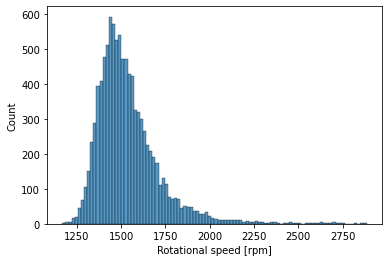

In [13]:
sns.histplot(df['Rotational speed [rpm]'])

In [14]:
np.log(df['Rotational speed [rpm]']).skew()

1.309369616254158

<AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Count'>

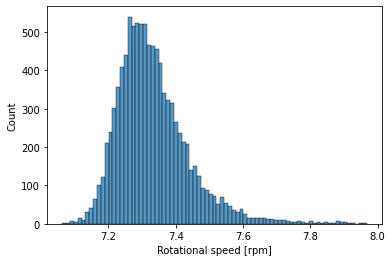

In [15]:
sns.histplot(np.log(df['Rotational speed [rpm]']))

<AxesSubplot:xlabel='Rotational speed [rpm]'>

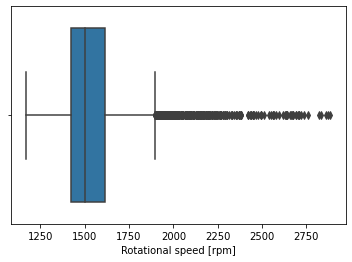

In [16]:
sns.boxplot(x=df['Rotational speed [rpm]'])

<AxesSubplot:xlabel='Torque [Nm]'>

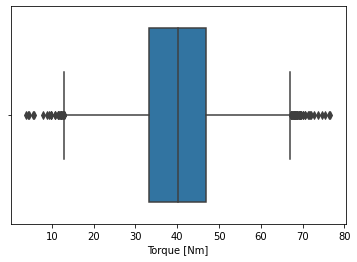

In [17]:
sns.boxplot(x=df['Torque [Nm]'])

<AxesSubplot:xlabel='Tool wear [min]'>

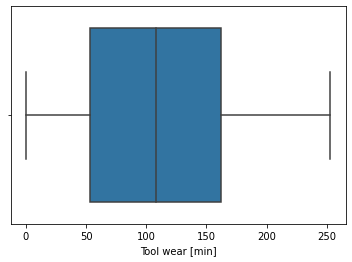

In [18]:
sns.boxplot(x=df['Tool wear [min]'])

In [19]:
df['rStats'] = stats.zscore(df['Torque [Nm]'])
df[['rStats']].describe().round(3)

,rStats
count,10000.000
mean,0.000
std,1.000
min,-3.630
25%,-0.681
50%,0.011
75%,0.683
max,3.673


### Insights

- 'Rotational speed [rpm]' feature is highly skewed and has outliers.

## 4. Exploring the Data with Visualization

### 4.1 Distribution of 'Target' Feature

<AxesSubplot:xlabel='Target', ylabel='count'>

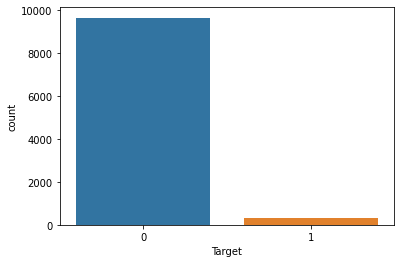

In [20]:
sns.countplot(df['Target'])

### 4.2 Distribution of 'Failure Type' feature.

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

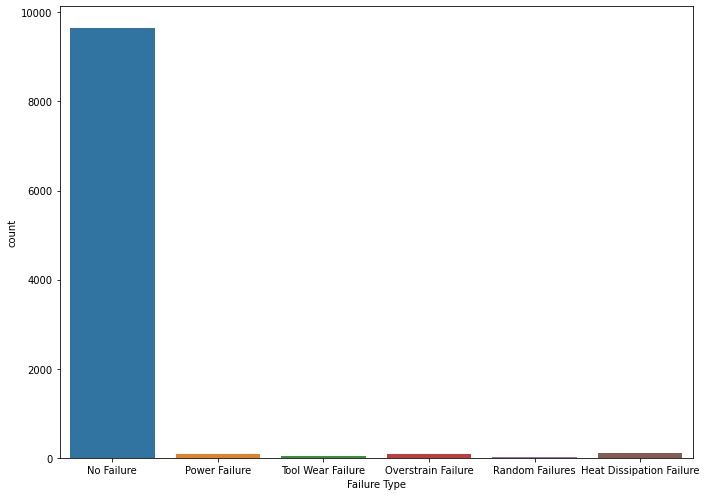

In [21]:
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True
sns.countplot(df['Failure Type'])

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

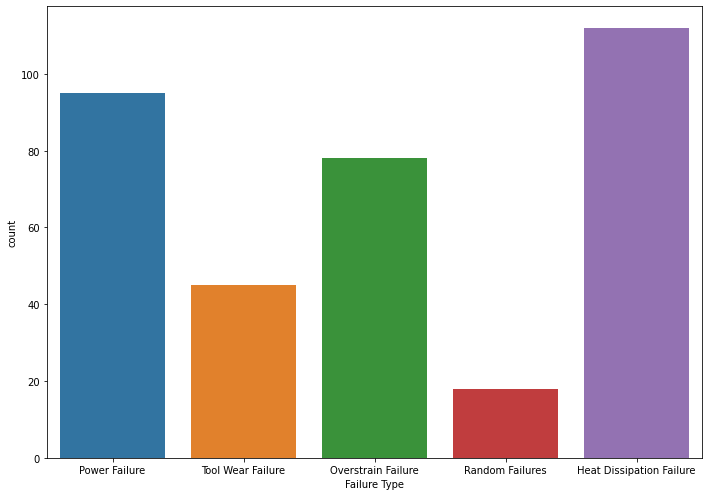

In [22]:
mask = df[df['Failure Type'] != 'No Failure']
sns.countplot(mask['Failure Type'])

### Insights

- Both of our dependent features are highly imbalanced.
- It may be the case in real world that Machine Failures are less but we want our model to correctly identify potential failures instead of just identifying majority of instances as No Failures. For that we will need to use Sampling techniques to fix the imbalance. From simple Weighting to complex approaches like ADASYN and SMOTE. And use robust metrics like Precision, Recall, ROC curve, AUC etc.
- The highest occuring failure is 'Heat Dissipation Failure' while 'Random Failures' are the least.

### 4.3 Distribution of 'Type' feature

<AxesSubplot:xlabel='Type', ylabel='count'>

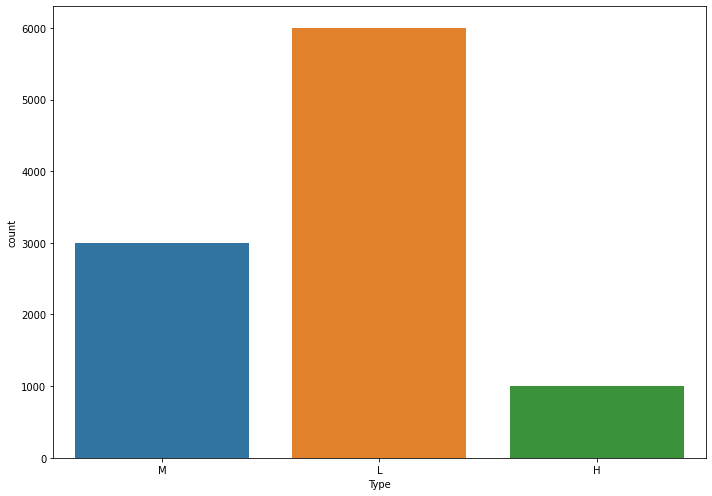

In [23]:
sns.countplot(df['Type'])

### Insights
- Failure is higher among Low Quality Machines.

<AxesSubplot:xlabel='Target', ylabel='Air temperature [K]'>

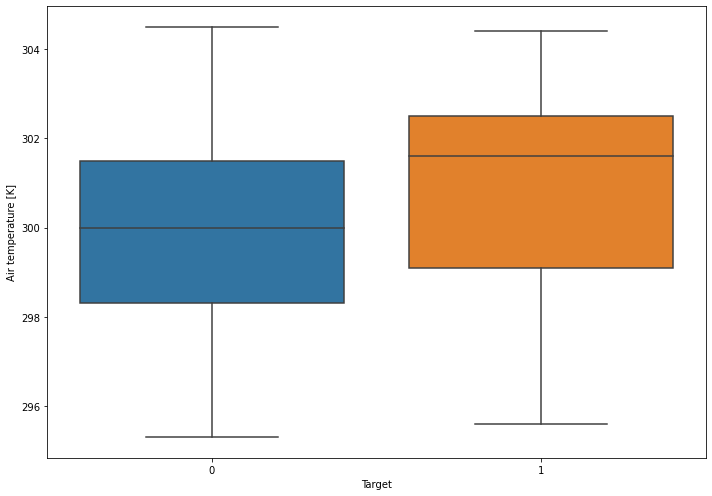

In [24]:
sns.boxplot(y=df['Air temperature [K]'], x=df['Target'])

<AxesSubplot:xlabel='Target', ylabel='Process temperature [K]'>

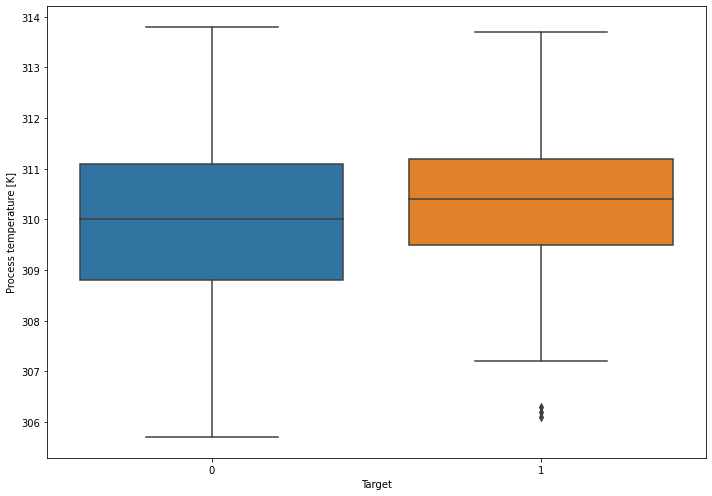

In [25]:
sns.boxplot(y=df['Process temperature [K]'], x=df['Target'])

<AxesSubplot:xlabel='Target', ylabel='Rotational speed [rpm]'>

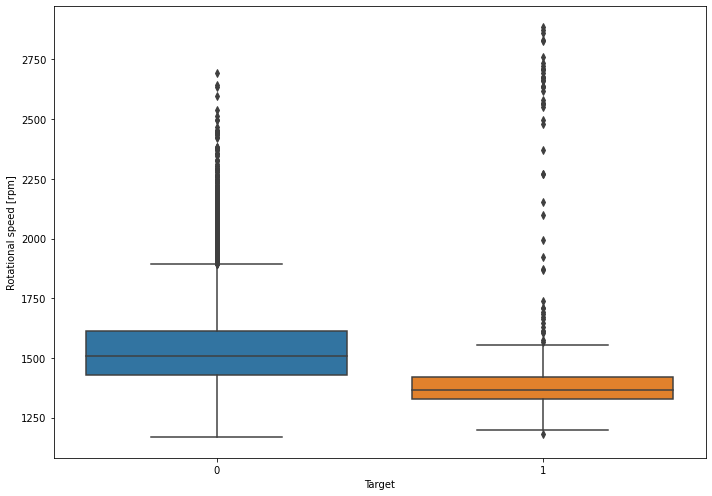

In [26]:
sns.boxplot(y=df['Rotational speed [rpm]'], x=df['Target'])

<AxesSubplot:xlabel='Target', ylabel='Tool wear [min]'>

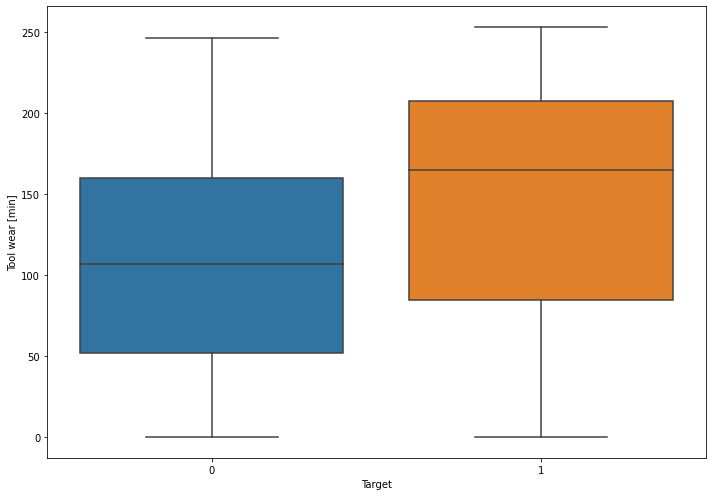

In [27]:
sns.boxplot(y=df['Tool wear [min]'], x=df['Target'])

<AxesSubplot:xlabel='Target', ylabel='Torque [Nm]'>

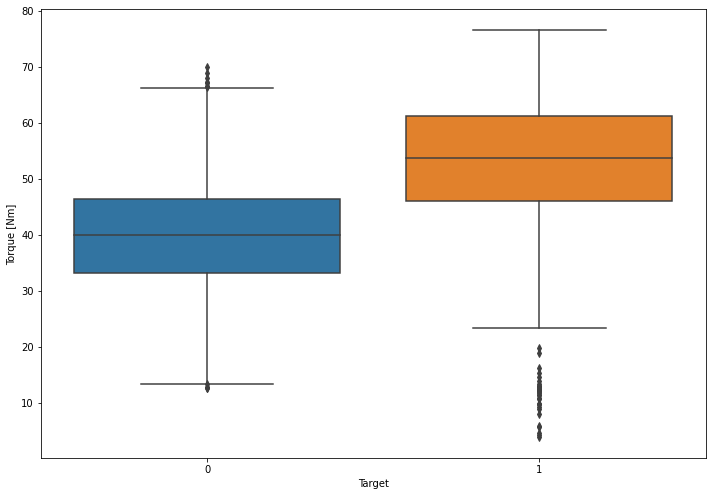

In [28]:
sns.boxplot(y=df['Torque [Nm]'], x=df['Target'])

### Insights
- Higher Air Temperature seems to lead to Failures.
- Higher Tool wear leads to Failure.
- Higher torque also leads to Failure.